# Installing arff

In [1]:
!pip install liac-arff
!pip install optuna

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=26ddbe175b1863da03f35ce39e7989fa13d8ac30c591fd9ebfc4fdae3eed1438
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


##  Data Loading

In [2]:
import pandas as pd
import arff

In [3]:
"""
This is how it is supposed to look like.
data_freq = arff.load('freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])
"""

'\nThis is how it is supposed to look like.\ndata_freq = arff.load(\'freMTPL2freq.arff\')\ndf_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",\n"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])\ndata_sev = arff.load(\'freMTPL2sev.arff\')\ndf_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])\n'

In [4]:
data_sev = pd.read_csv('/content/csv_result-freMTPL2sev.csv')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])
print(df_sev.head())
data_freq = pd.read_csv('/content/csv_result-freMTPL2freq.csv')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
print(df_freq.head())


     IDpol  ClaimAmount
0     1552       995.20
1  1010996      1128.12
2  4024277      1851.11
3  4007252      1204.00
4  4046424      1204.00
   IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0        1      0.10    D         5       0       55          50   
1    3.0        1      0.77    D         5       0       55          50   
2    5.0        1      0.75    B         6       2       52          50   
3   10.0        1      0.09    B         7       0       46          50   
4   11.0        1      0.84    B         7       0       46          50   

  VehBrand   VehGas  Density Region  
0      B12  Regular     1217    R82  
1      B12  Regular     1217    R82  
2      B12   Diesel       54    R22  
3      B12   Diesel       76    R72  
4      B12   Diesel       76    R72  


## Data Preparation

In [5]:
## Aggregate the Claimamount for each contract.
df_sev_aggregated = df_sev.groupby('IDpol')['ClaimAmount'].sum()

# Do a left join and replace nans with zeros.
merged_df = pd.merge(df_freq, df_sev_aggregated, on='IDpol', how='left')
merged_df["ClaimAmount"].fillna(0, inplace=True)


## Data Visualisations

<Axes: >

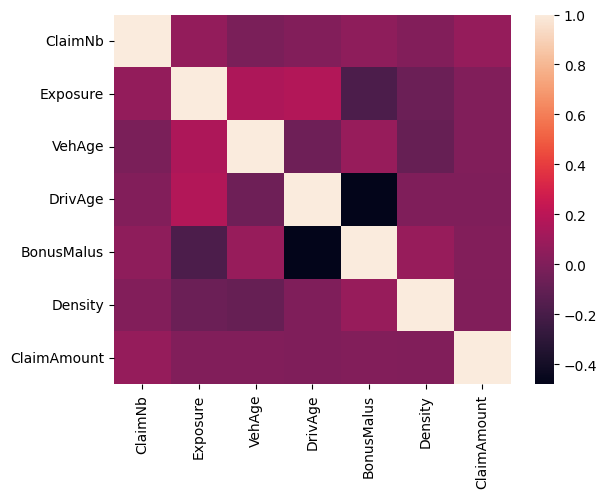

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Look into Correlations
corr = merged_df[['ClaimNb', 'Exposure', 'VehAge', 'DrivAge',
       'BonusMalus', 'Density', 'ClaimAmount']].corr()
sns.heatmap(corr)



The 99th percentile is 1253.3288


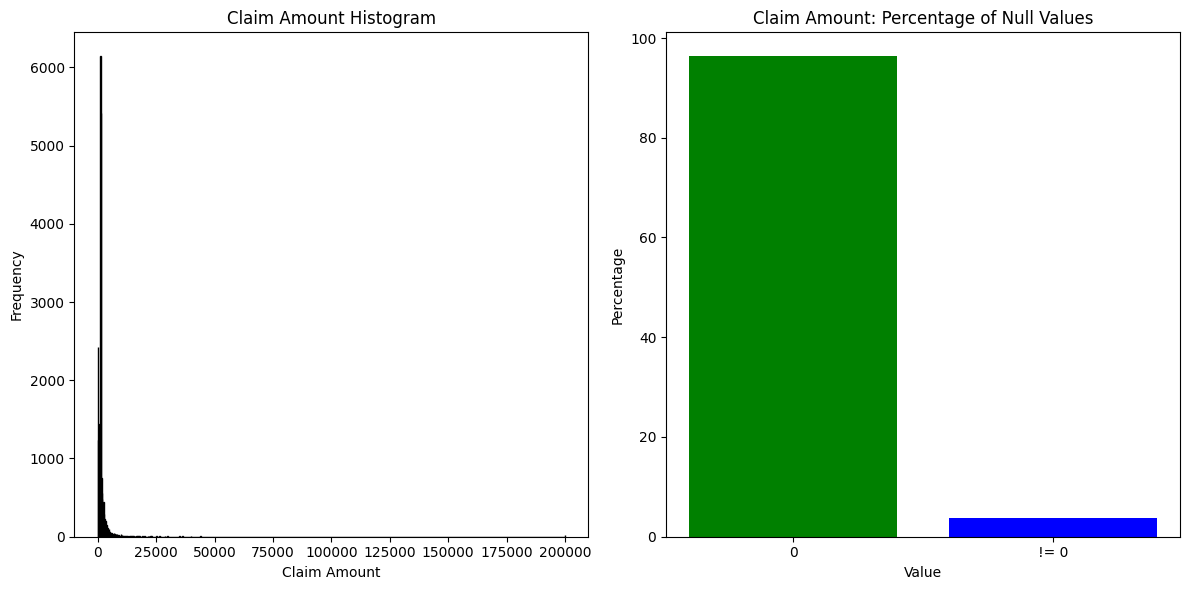

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 6))

# Create a histogram
plt.subplot(1, 2, 1)
plt.hist(merged_df[merged_df["ClaimAmount"] != 0]["ClaimAmount"], bins=1000, color='blue', edgecolor='black')
plt.title("Claim Amount Histogram")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")

# Calculate and print the 99th percentile
p = np.percentile(merged_df["ClaimAmount"], 99)
print("The 99th percentile is", p)

# Calculate the percentage of values that are 0 and not equal to 0
total_values = len(merged_df["ClaimAmount"])
zero_values = len(merged_df[merged_df["ClaimAmount"] == 0])
non_zero_values = total_values - zero_values

percentage_zero = (zero_values / total_values) * 100
percentage_non_zero = (non_zero_values / total_values) * 100

# Create a bar plot for percentages
plt.subplot(1, 2, 2)
plt.bar(['0', '!= 0'], [percentage_zero, percentage_non_zero], color=['green', 'blue'])
plt.title("Claim Amount: Percentage of Null Values")
plt.xlabel("Value")
plt.ylabel("Percentage")

plt.tight_layout()
plt.show()


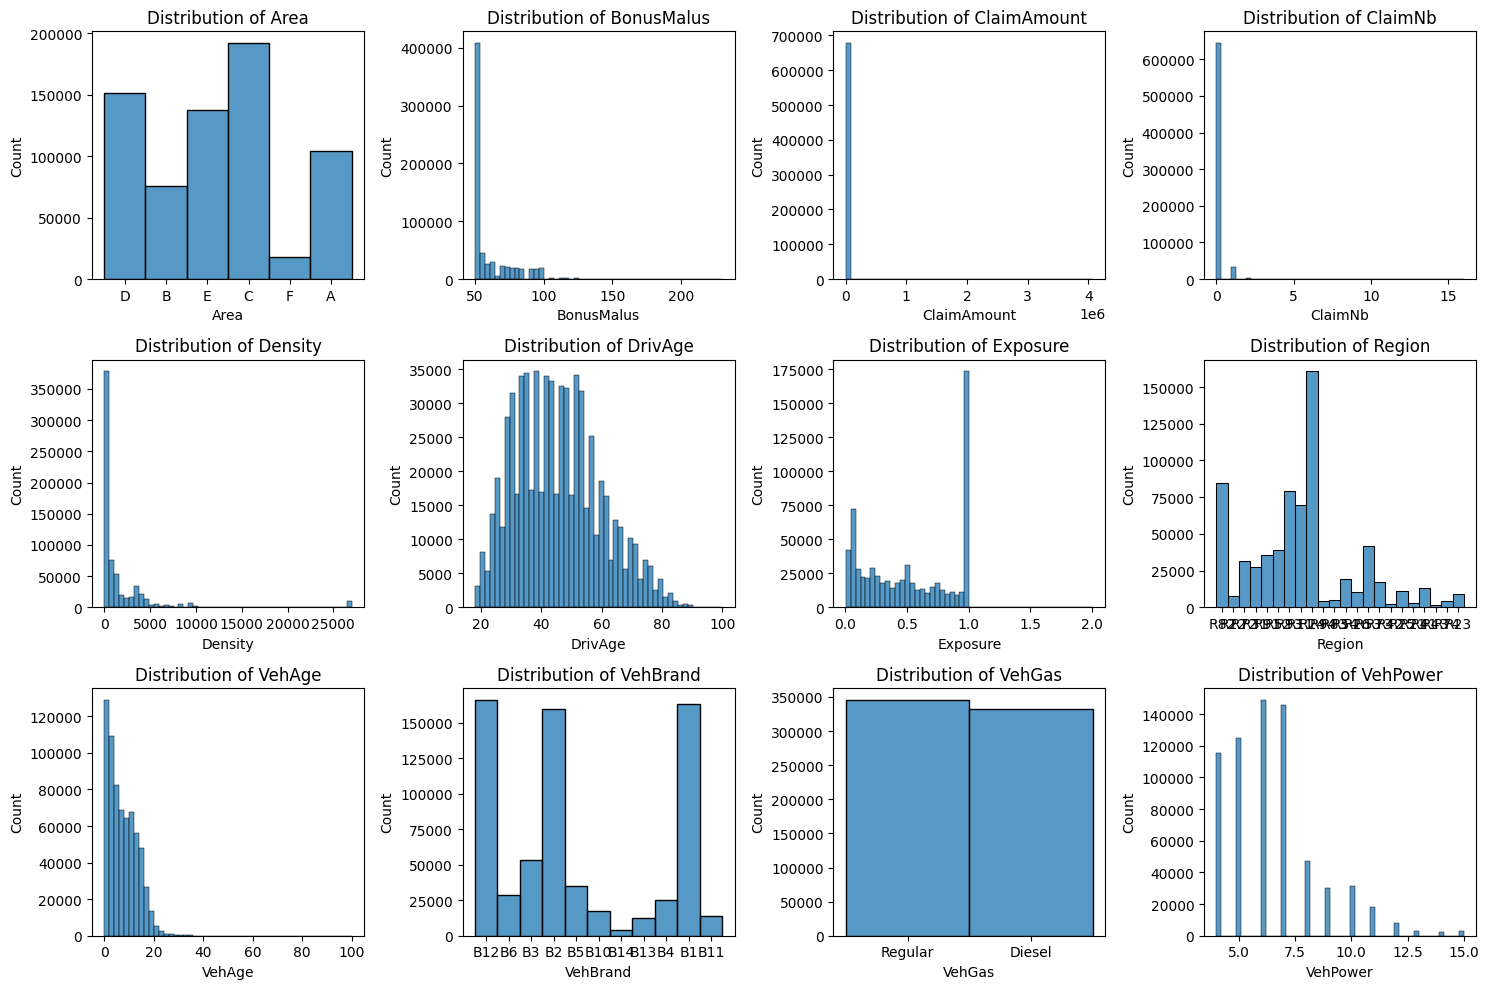

In [8]:
# Exclude 'IDpol' from the columns of interest
columns_of_interest = merged_df.columns.difference(['IDpol'])

# Select the columns of interest
selected_df = merged_df[columns_of_interest]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot the distributions
for i, column in enumerate(columns_of_interest):
    sns.histplot(selected_df[column], kde=False, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()



## Feature Engineering

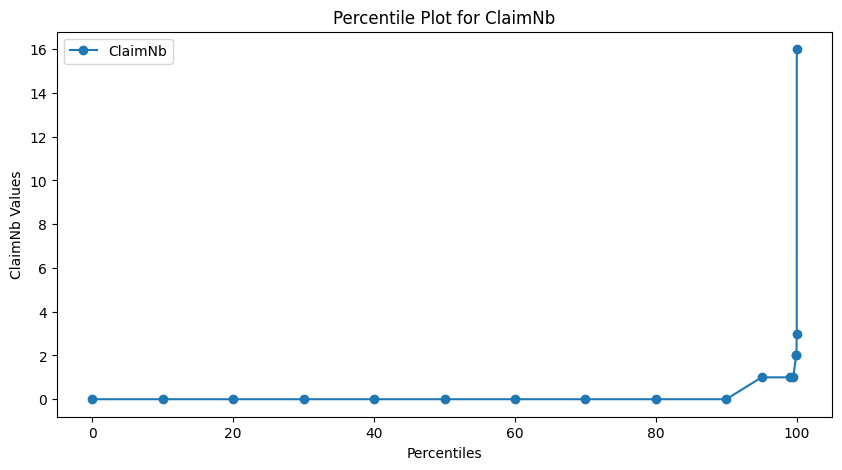

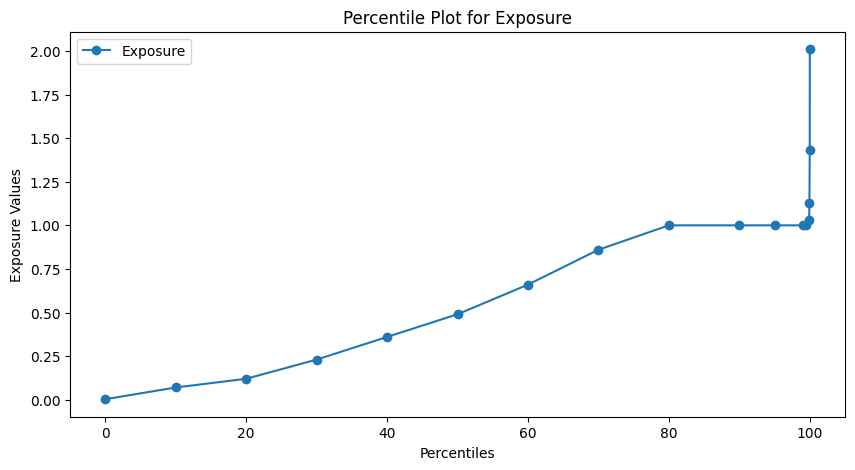

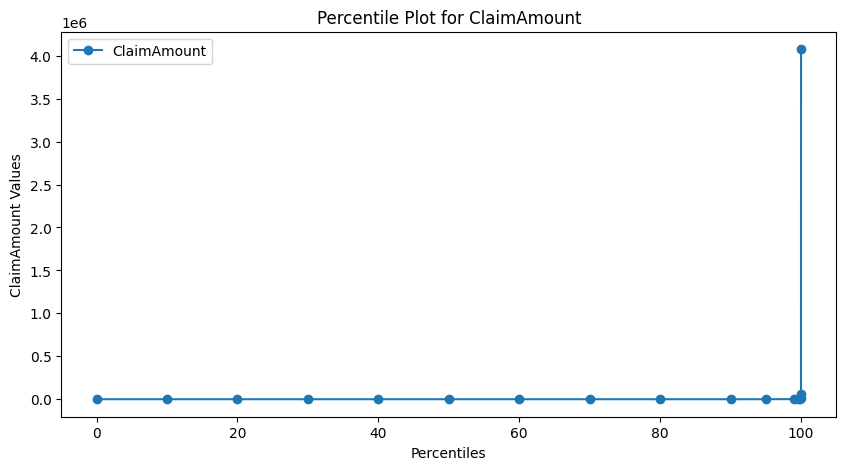

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Look into percentiles to get a reasonable cutoff for outliers.

def plot_percentiles(column_name, percentiles, merged_df):
    percentile_ranks = [np.percentile(merged_df[column_name], p) for p in percentiles]

    plt.figure(figsize=(10, 5))
    plt.plot(percentiles, percentile_ranks, label=column_name, marker='o')
    plt.xlabel('Percentiles')
    plt.ylabel(f'{column_name} Values')
    plt.title(f'Percentile Plot for {column_name}')
    plt.legend()
    plt.show()

# Beispielwerte für die Perzentile
gesuchte_perzentile = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99, 99.5, 99.9, 99.95, 99.99, 100]

# Plot für ClaimNb
plot_percentiles("ClaimNb", gesuchte_perzentile, merged_df)

# Plot für Exposure
plot_percentiles("Exposure", gesuchte_perzentile, merged_df)

# Plot für ClaimAmount
plot_percentiles("ClaimAmount", gesuchte_perzentile, merged_df)



In [10]:
# Correct for a few exceptionally large claim amounts
merged_df["ClaimNb"] = merged_df["ClaimNb"].clip(upper=4)
merged_df["Exposure"] = merged_df["Exposure"].clip(upper=1)
merged_df["ClaimAmount"] = merged_df["ClaimAmount"].clip(upper=200000)

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

log_scale_transformer = make_pipeline(
    FunctionTransformer(func=np.log),
    StandardScaler()
)

column_trans = ColumnTransformer(
    [
        ("binned_numeric", KBinsDiscretizer(n_bins=10),
            ["VehAge", "DrivAge"]),
        ("onehot_categorical", OneHotEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"]),
        ("passthrough_numeric", "passthrough",
            ["BonusMalus"]),
        ("log_scaled_numeric", log_scale_transformer,
            ["Density"]),
    ],
    remainder="drop",
)
X = column_trans.fit_transform(merged_df)

# Get the Pure Premium as the Claim Amount over the Exposure.
merged_df["PurePremium"] = merged_df["ClaimAmount"] / merged_df["Exposure"]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [24]:
print(type(X))

<class 'scipy.sparse._csr.csr_matrix'>


## Splitting Data

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test, X_train, X_test = train_test_split(merged_df, X, random_state=0)


In [34]:
print(df_test["PurePremium"].describe())

count    1.695040e+05
mean     3.112377e+02
std      2.377938e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.102500e+06
Name: PurePremium, dtype: float64


## Modeling

In [39]:
glm_pure_premium = TweedieRegressor(power=1.9, alpha=0.1, solver="newton-cholesky")
glm_pure_premium.fit(X_train, df_train["PurePremium"], sample_weight=df_train["Exposure"])
out = glm_pure_premium.predict(X_test)

## Model Evaluation


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Squared Error is {}".format(mean_squared_error(out, df_test["PurePremium"])))
print("Mean Absolute Error is {}".format(mean_absolute_error(out, df_test["PurePremium"])))

Mean Squared Error is 565428715.1646793
Mean Absolute Error is 457.9576297677312


In [44]:
def plot_predictions_and_targets(y_test, y_pred):

  # Create an index for the x-axis
  x_values = range(len(y_test))
  # Plotting the actual values (y_test) as blue dots
  plt.scatter(x_values, y_test, color='blue', label='Actual (y_test)')
  # Plotting the predicted values (y_pred) as red dots
  plt.scatter(x_values, y_pred, color='red', label='Predicted (y_pred)')
  # Adding labels and title
  plt.xlabel('Examples')
  plt.ylabel('Values')
  plt.title('Actual vs Predicted Values')
  plt.legend()
  # Show the plot
  plt.show()


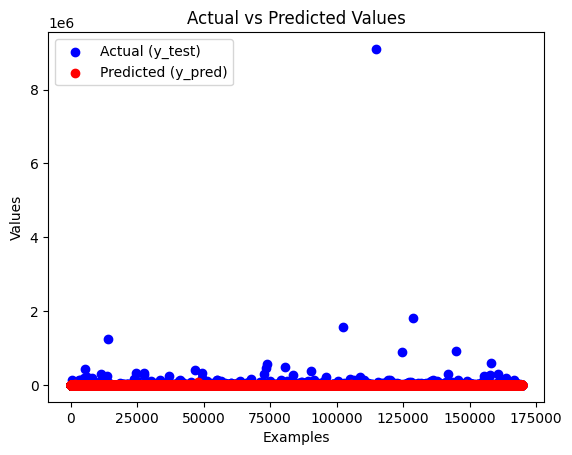

In [45]:
plot_predictions_and_targets(df_test["PurePremium"], out)

## Feature Importance